In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_reduced.csv')

/tmp/ipykernel_457/359020440.py:1: DtypeWarning: Columns (11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/data_reduced.csv')


### Distribution des émissions par pays (Allemagne et France)

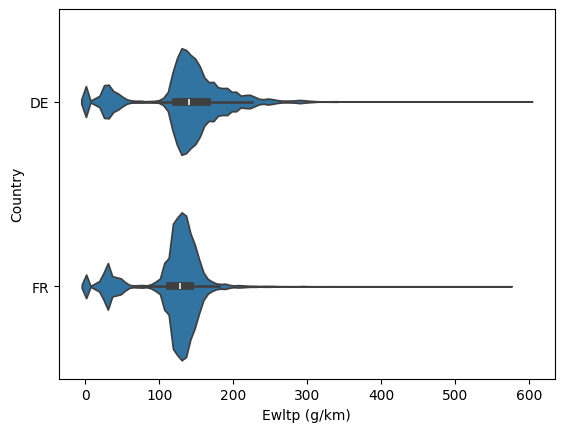

In [4]:
sns.violinplot(data=df, x='Ewltp (g/km)', y='Country');

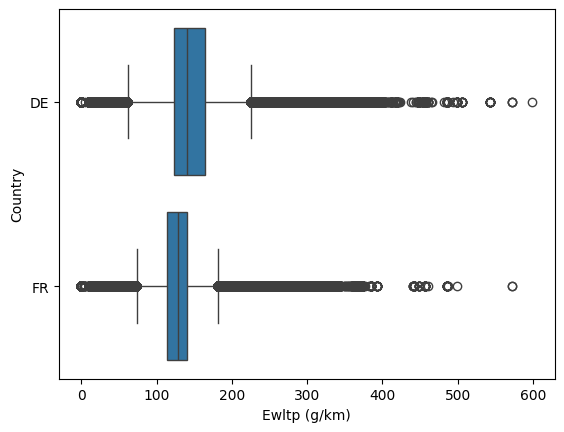

In [5]:
sns.boxplot(data=df, x='Ewltp (g/km)', y='Country');

### Véhicules par marque (10 plus importants)

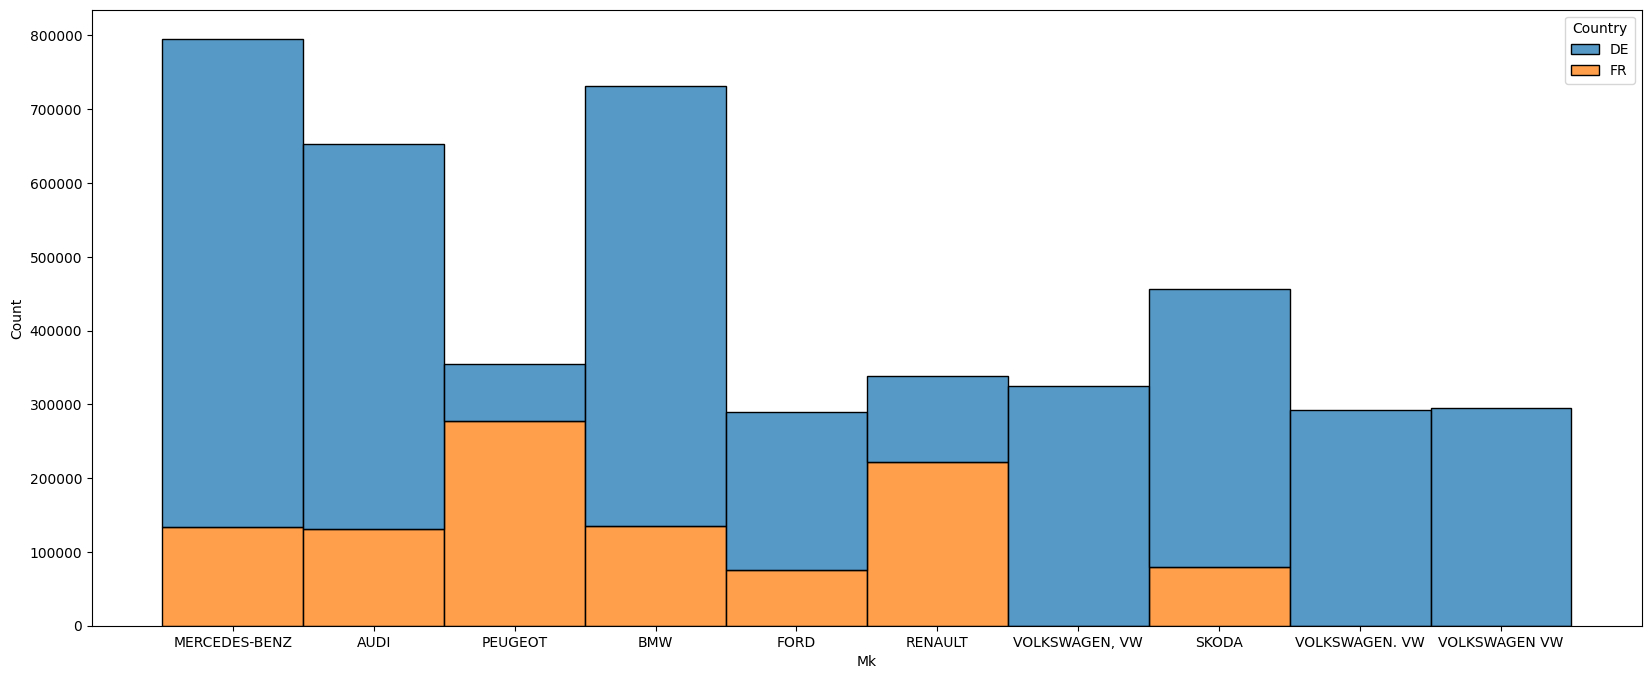

In [6]:
gb = df.groupby('Mk').agg(nb_cars=('Mk', 'count')).sort_values(by='nb_cars', ascending=False).reset_index().head(10)


plt.figure(figsize=(20, 8))
sns.histplot(data=df[df['Mk'].isin(gb['Mk'].unique())], x='Mk', hue='Country', multiple="stack");

### Evolution du nombre de  voiture par mois et par pays

In [9]:
df["Date of registration"] = pd.to_datetime(df["Date of registration"])

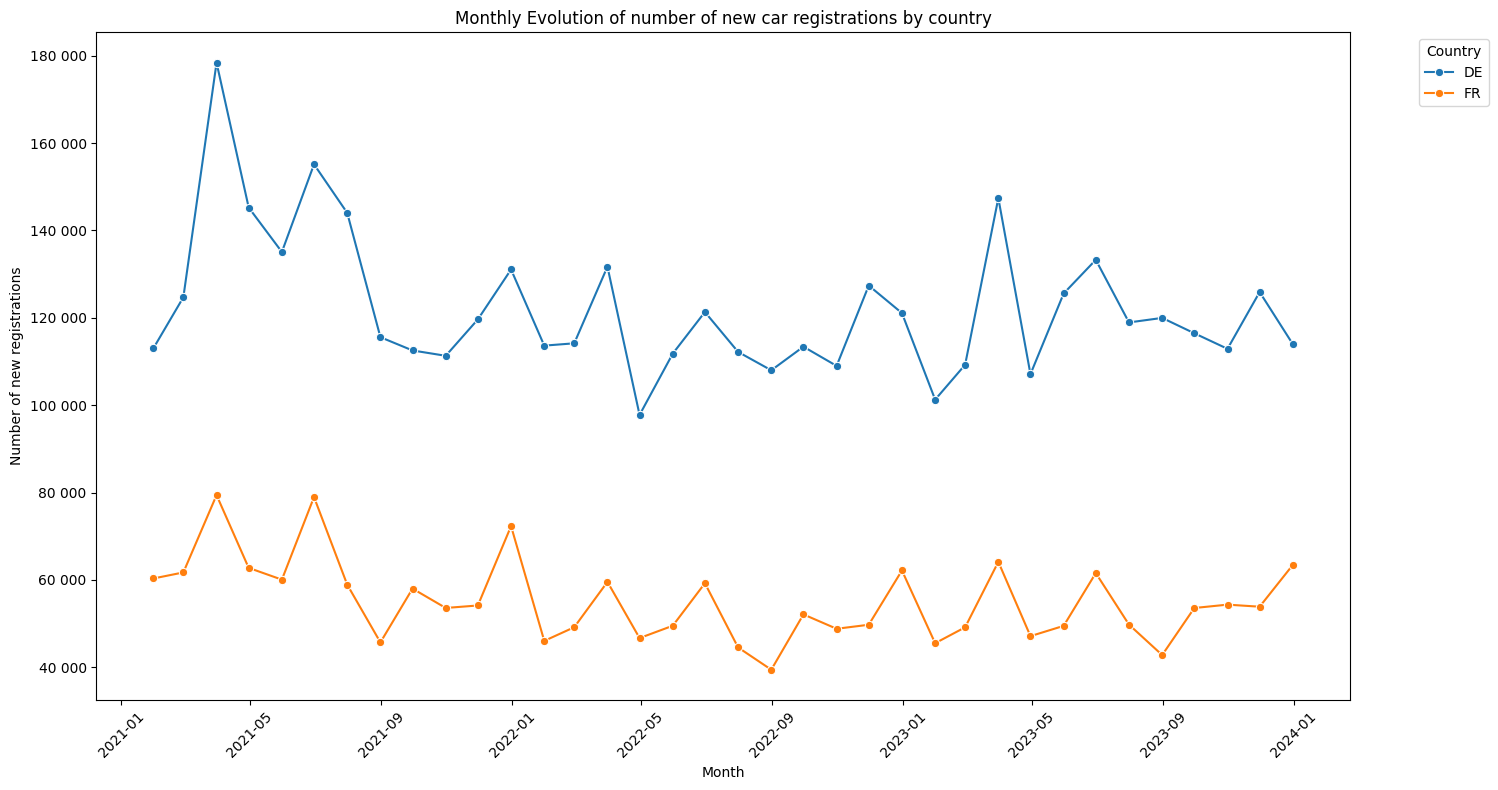

In [21]:
from matplotlib.ticker import FuncFormatter

# Pour formatter les nombres avec un espace en séparateur de millier
format_spaces = lambda x, pos: format(int(round(x)), ',d').replace(',', ' ')


count_country = df.groupby([
    "Country",
    pd.Grouper(key="Date of registration", freq="ME")
]).size().reset_index(name="count")

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=count_country,
    x="Date of registration",
    y="count",
    hue="Country",
    marker='o'
)

plt.title('Monthly Evolution of number of new car registrations by country')
plt.xlabel('Month')
plt.ylabel('Number of new registrations')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Applique le format à y-axis
ax = plt.gca() 
ax.yaxis.set_major_formatter(FuncFormatter(format_spaces))

plt.show()

### Evolution des emissions moyennes par mois et par pays

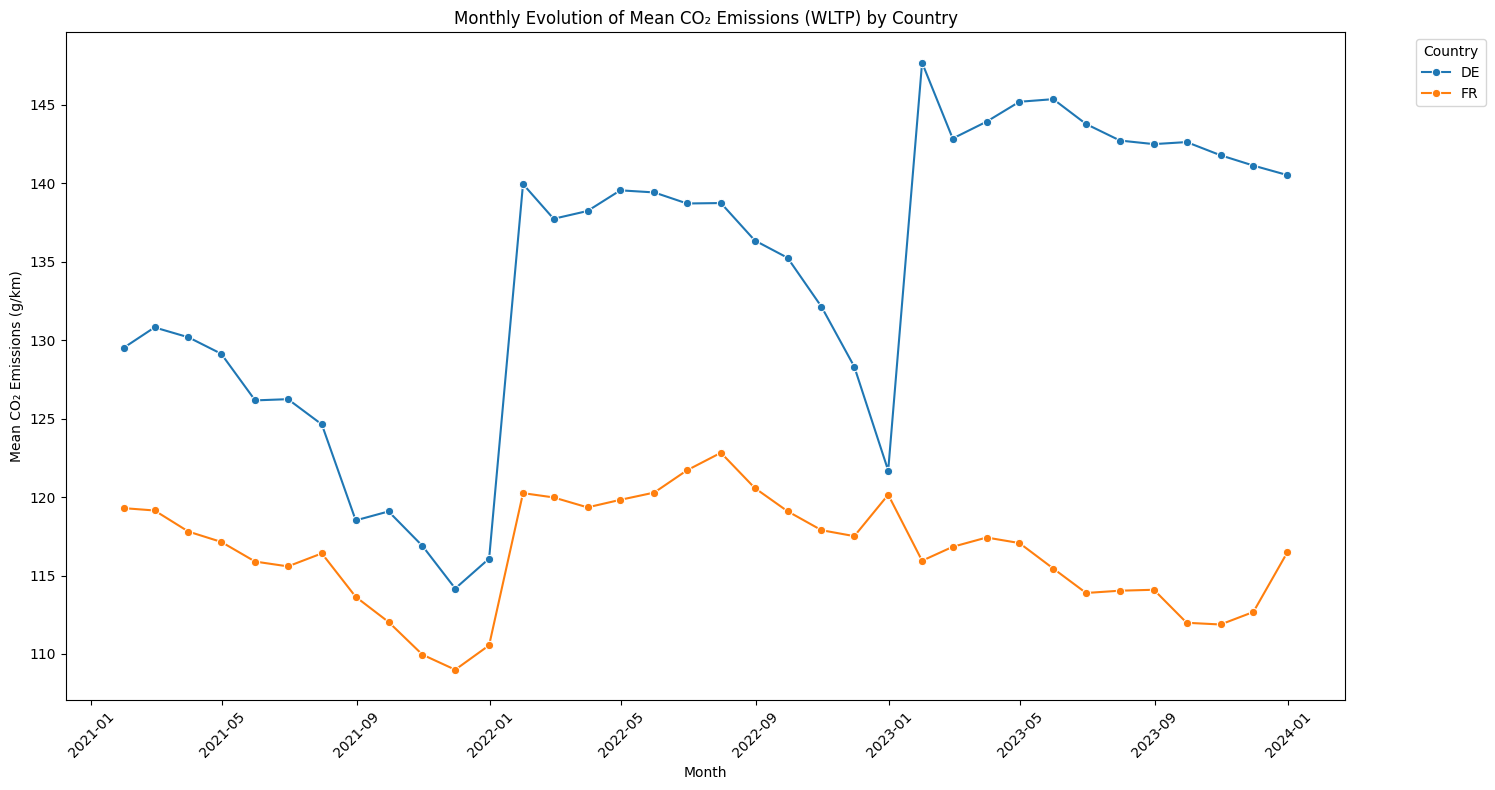

In [16]:
monthly_country_mean = df.groupby(
    ['Country', pd.Grouper(key="Date of registration", freq="ME")]
)['Ewltp (g/km)'].mean().reset_index(name='Mean_Ewltp')

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=monthly_country_mean,
    x='Date of registration',
    y='Mean_Ewltp',
    hue='Country',
    marker='o'
)

plt.title('Monthly Evolution of Mean CO₂ Emissions (WLTP) by Country')
plt.xlabel('Month')
plt.ylabel('Mean CO₂ Emissions (g/km)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### relations entre variables

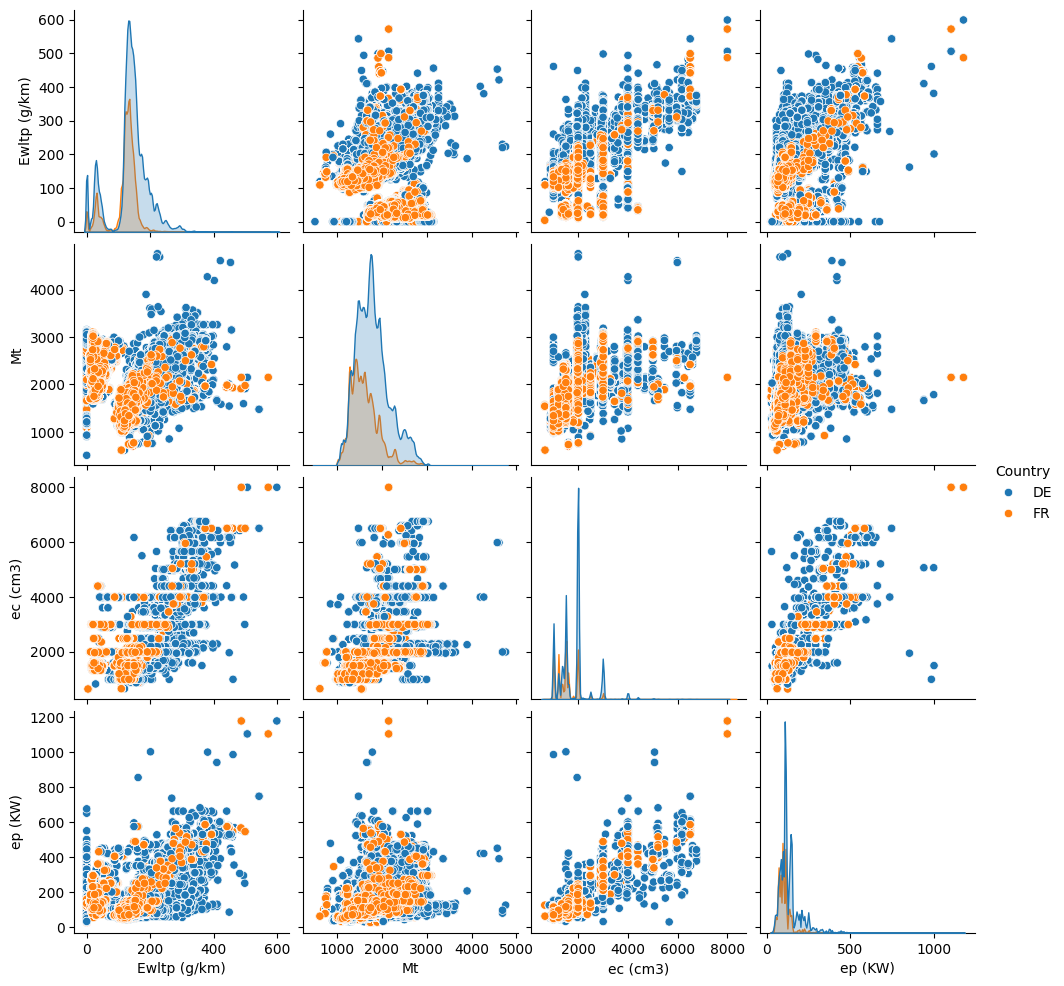

In [23]:
sns.pairplot(data=df[["Ewltp (g/km)", "Mt", "Ft", "ec (cm3)", "ep (KW)", "Country"]], hue='Country');